In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\User\Documents\AI-Coursework2025\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
import seaborn as sns

# 2. Exploratory Data Analysis (EDA)
# Display basic info and statistics
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%

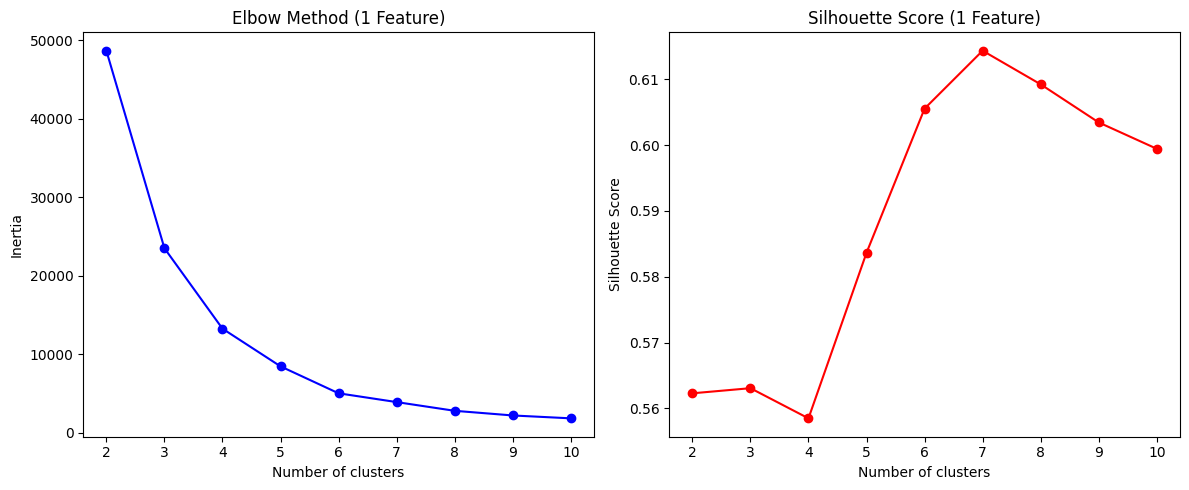

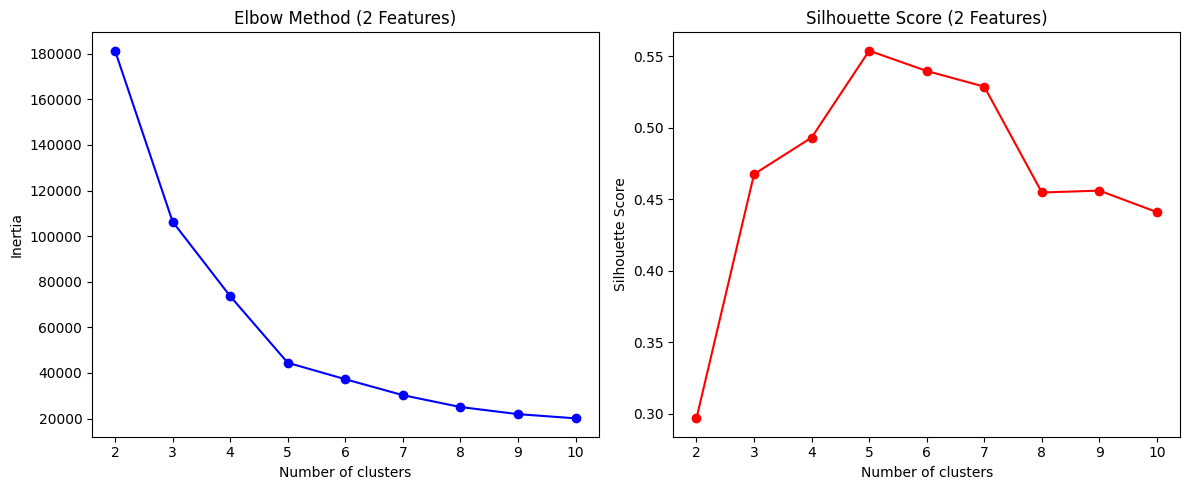

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 3a. K-means clustering using 1 suitable feature (e.g., 'Annual Income (k$)')
feature_1 = 'Annual Income (k$)'
X1 = df[[feature_1]]

# Find optimal number of clusters using elbow method and silhouette score
inertia = []
silhouette = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X1)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X1, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method (1 Feature)')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (1 Feature)')
plt.tight_layout()
plt.show()

# 3b. K-means clustering using 2 suitable features (e.g., 'Annual Income (k$)' and 'Spending Score (1-100)')
features_2 = ['Annual Income (k$)', 'Spending Score (1-100)']
X2 = df[features_2]

inertia_2 = []
silhouette_2 = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X2)
    inertia_2.append(kmeans.inertia_)
    silhouette_2.append(silhouette_score(X2, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia_2, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method (2 Features)')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_2, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (2 Features)')
plt.tight_layout()
plt.show()


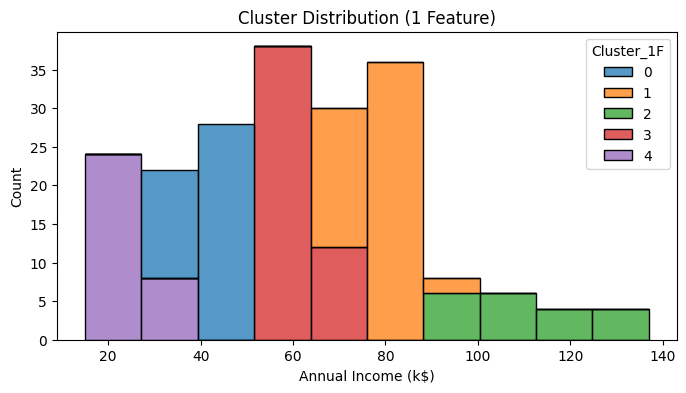

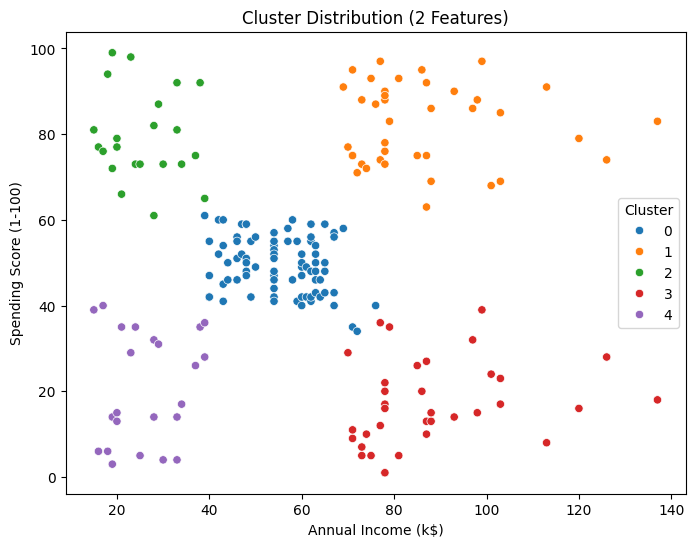

Comment:
With 1 feature, clusters are separated only by annual income, which may not capture spending behavior. With 2 features, clusters are more distinct and reflect both income and spending patterns, providing better customer segmentation.


In [7]:
# 4. Visualise and compare the clustering done in 3a and 3b
# For 1 feature (Annual Income)
optimal_k_1 = 5  # Example, choose based on elbow/silhouette
kmeans_1 = KMeans(n_clusters=optimal_k_1, random_state=42, n_init=10)
df['Cluster_1F'] = kmeans_1.fit_predict(X1)

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x=feature_1, hue='Cluster_1F', multiple='stack', palette='tab10')
plt.title('Cluster Distribution (1 Feature)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

# For 2 features (Annual Income & Spending Score)
optimal_k_2 = 5  # Example, choose based on elbow/silhouette
kmeans_2 = KMeans(n_clusters=optimal_k_2, random_state=42, n_init=10)
df['Cluster_2F'] = kmeans_2.fit_predict(X2)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=features_2[0], y=features_2[1], hue='Cluster_2F', palette='tab10')
plt.title('Cluster Distribution (2 Features)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

#Comment on the distribution of clusters
print("Comment:")
print("With 1 feature, clusters are separated only by annual income, which may not capture spending behavior. With 2 features, clusters are more distinct and reflect both income and spending patterns, providing better customer segmentation.")



In [8]:
# 5. Case example: Mall customer engagement suggestions
print("\nCase Example Suggestion:")
print("Using the 2-feature clustering, mall management can tailor engagement strategies for each cluster. For example:")
print("- High income, high spending: Offer exclusive VIP events and loyalty programs.")
print("- High income, low spending: Provide personalized offers to encourage more spending.")
print("- Low income, high spending: Give discounts or bundled offers to retain these valuable customers.")
print("- Low income, low spending: Use general promotions to increase mall visits.")
print("This segmentation allows the mall to allocate resources efficiently and improve customer satisfaction.")



Case Example Suggestion:
Using the 2-feature clustering, mall management can tailor engagement strategies for each cluster. For example:
- High income, high spending: Offer exclusive VIP events and loyalty programs.
- High income, low spending: Provide personalized offers to encourage more spending.
- Low income, high spending: Give discounts or bundled offers to retain these valuable customers.
- Low income, low spending: Use general promotions to increase mall visits.
This segmentation allows the mall to allocate resources efficiently and improve customer satisfaction.
